In [272]:
# Task 1, 2 and 3 (load and clean the data)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.decomposition import PCA






In [273]:
red_dataset = pd.read_excel('Data/winequality-red.xlsx')
red_dataframe = pd.read_excel('Data/winequality-red.xlsx', header=1)
red_dataframe.drop_duplicates(inplace=True)
red_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [274]:
red_dataframe.shape

(1359, 12)

In [275]:

red_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [276]:
list(red_dataframe)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [277]:
red_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [278]:
red_dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [279]:
red_dataframe.index

Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
       ...
       1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1597, 1598],
      dtype='int64', length=1359)

In [280]:
red_dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [281]:
red_dataframe["wine_type"] = "red"
red_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [282]:
white_dataset = pd.read_excel('Data/winequality-white.xlsx')
white_dataframe = pd.read_excel('Data/winequality-white.xlsx', header=1)
white_dataframe.drop_duplicates(inplace=True)
white_dataframe['wine_type'] = 'white'
white_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [283]:
white_dataframe.shape


(3961, 13)

In [284]:
white_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  wine_type             3961 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 433.2+ KB


In [285]:
list(white_dataframe)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'wine_type']

In [286]:
white_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [287]:
white_dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [288]:
white_dataframe.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [289]:
white_quality=white_dataframe
white_quality['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [290]:
white_quality.quality.value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

In [291]:
white_dataframe.shape


(3961, 13)

In [292]:
white_dataframe['wine_type'] = 'white'

In [293]:
white_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [294]:
white_dataframe.drop_duplicates(inplace=True)


In [295]:
white_dataframe.shape


(3961, 13)

In [296]:
all_wine = pd.concat([white_dataframe, red_dataframe], ignore_index=True)

In [297]:
all_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [298]:
# Task 4, 5, 6, 7, 8, 9 and 10 (explore the data)
# Selecting all the columns that are not numeric
data_column_category = all_wine.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['wine_type'], dtype='object')

In [299]:
# Printing the new dataframe that are not numeric
data_column_category = all_wine.select_dtypes(exclude=[np.number]).columns

all_wine[data_column_category]

,wine_type
0,white
1,white
2,white
3,white
4,white
...,...
5315,red
5316,red
5317,red
5318,red


In [300]:
# Iterating through this category column and convert it to numeric data using LabelEncoder()

# Creating the object instance
label_encoder = LabelEncoder()

for i in data_column_category:

    all_wine[i] = label_encoder.fit_transform(all_wine[i])

print("Label Encoded Data: ")

all_wine


Label Encoded Data: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [301]:
# Imputing the numerical data of all columns with its mean
# Finding the mean of all columns using the mean() function of pandas
column_means = all_wine.mean(numeric_only=True)
print(column_means)

fixed acidity             7.215179
volatile acidity          0.344130
citric acid               0.318494
residual sugar            5.048477
chlorides                 0.056690
free sulfur dioxide      30.036654
total sulfur dioxide    114.109023
density                   0.994535
pH                        3.224664
sulphates                 0.533357
alcohol                  10.549241
quality                   5.795677
wine_type                 0.744549
dtype: float64


In [302]:
# Imputing the numerical data of all columns with its median
# Finding the median of all columns using the median() function of the pandas
column_medians = all_wine.median(numeric_only=True)
print(column_medians)

fixed acidity             7.00000
volatile acidity          0.30000
citric acid               0.31000
residual sugar            2.70000
chlorides                 0.04700
free sulfur dioxide      28.00000
total sulfur dioxide    116.00000
density                   0.99465
pH                        3.21000
sulphates                 0.51000
alcohol                  10.40000
quality                   6.00000
wine_type                 1.00000
dtype: float64


In [303]:
# Imputing the numerical data of all columns with its mode
# finding the mode of all columns using the mode() function of pandas
column_modes = all_wine.mode(numeric_only=True)
print(column_modes)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.28          0.3             1.6      0.036   
1            NaN               NaN          NaN             2.0        NaN   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  6.0                 111.0    0.992  3.16        0.5   
1                  NaN                   NaN      NaN   NaN        NaN   

   alcohol  quality  wine_type  
0      9.5      6.0        1.0  
1      NaN      NaN        NaN  


In [304]:
# Calculate the mode (most frequent value) for each column and select the first mode in case of multiple
single_mode = all_wine.mode().iloc[0]
print(single_mode)

fixed acidity             6.800
volatile acidity          0.280
citric acid               0.300
residual sugar            1.600
chlorides                 0.036
free sulfur dioxide       6.000
total sulfur dioxide    111.000
density                   0.992
pH                        3.160
sulphates                 0.500
alcohol                   9.500
quality                   6.000
wine_type                 1.000
Name: 0, dtype: float64


In [305]:
all_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


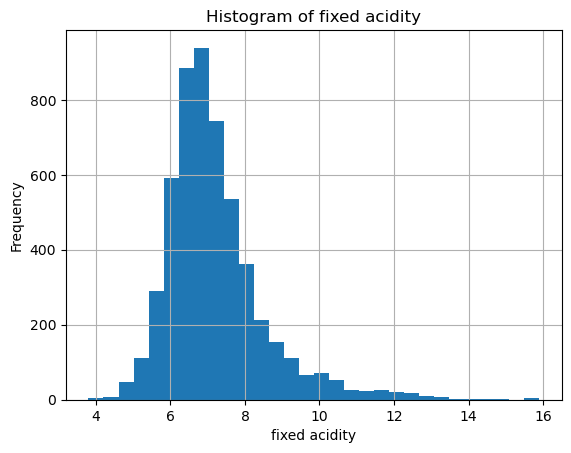

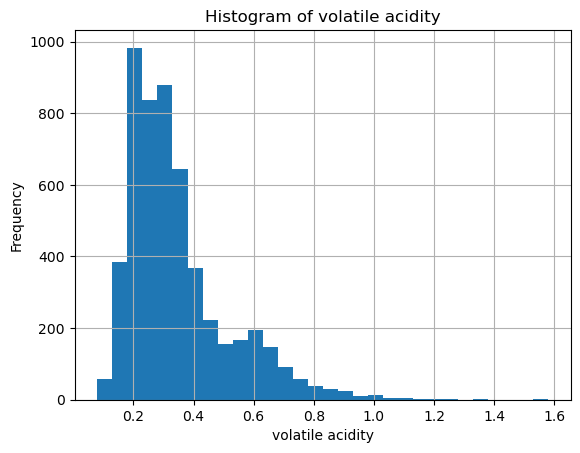

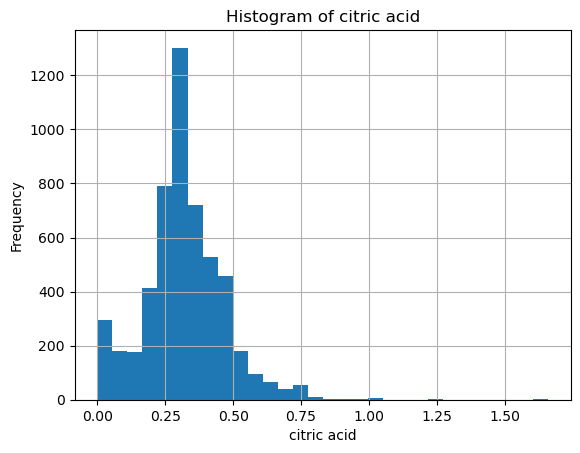

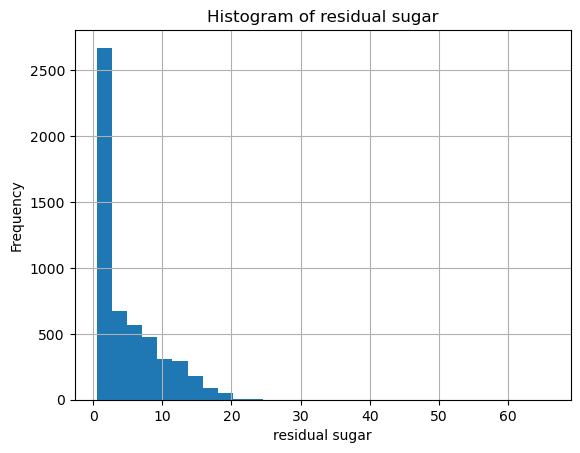

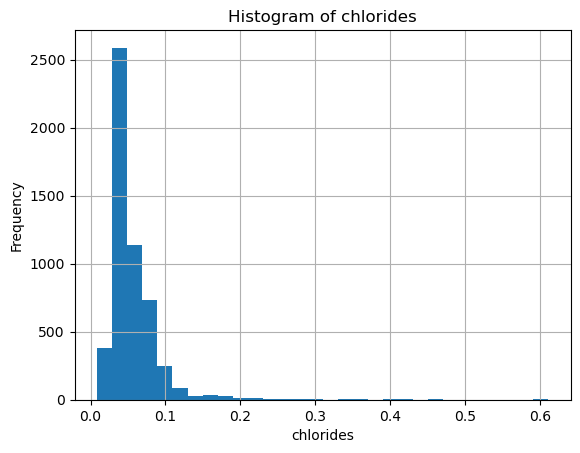

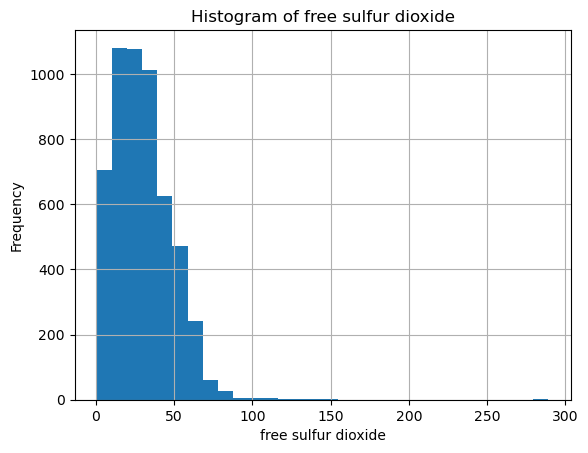

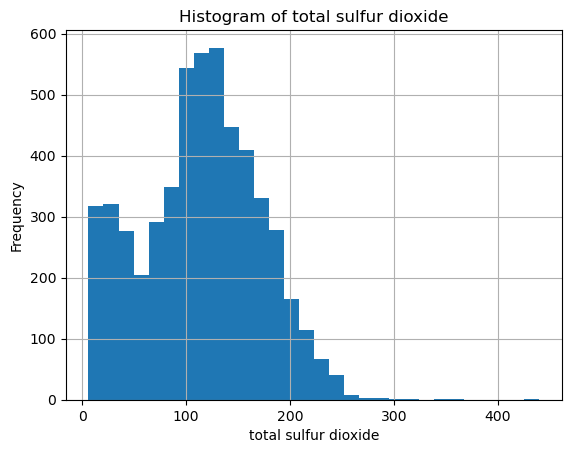

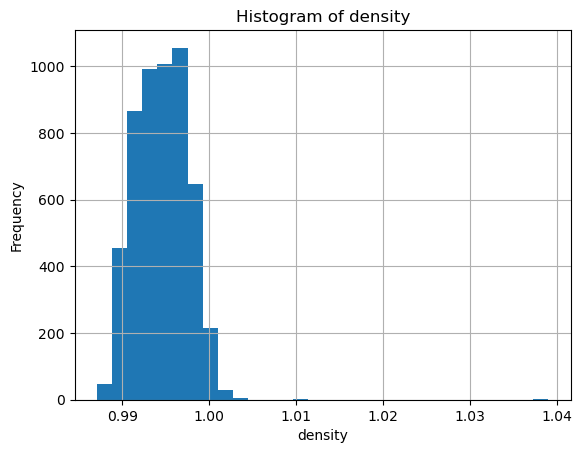

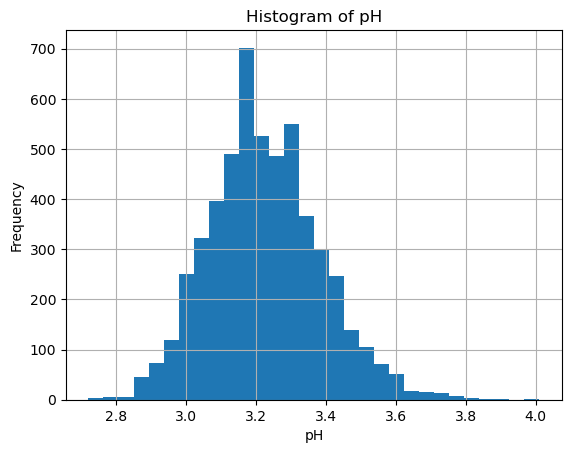

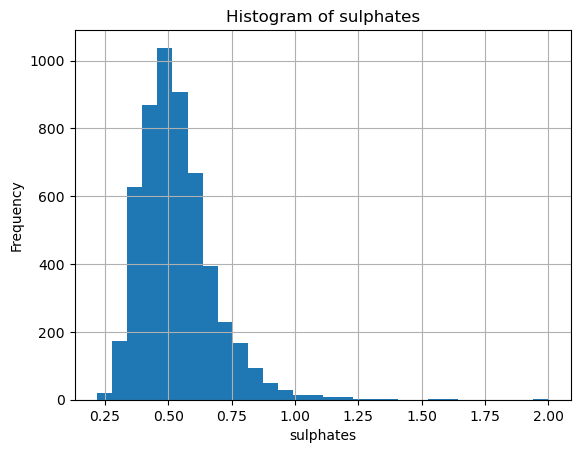

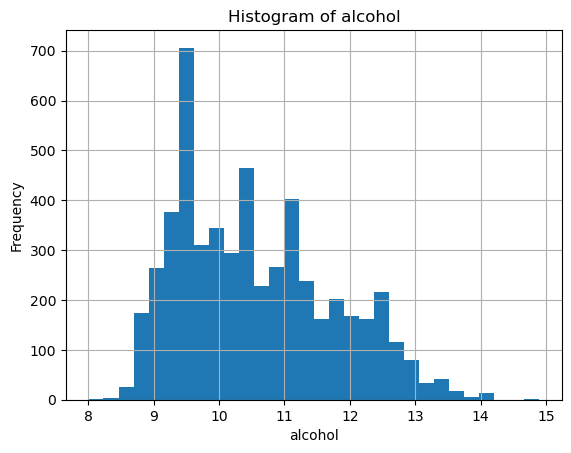

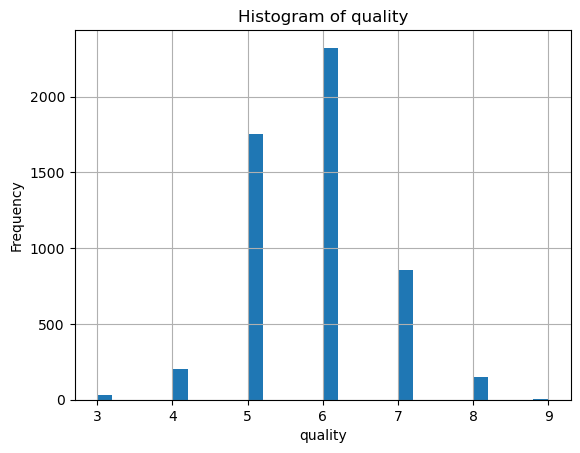

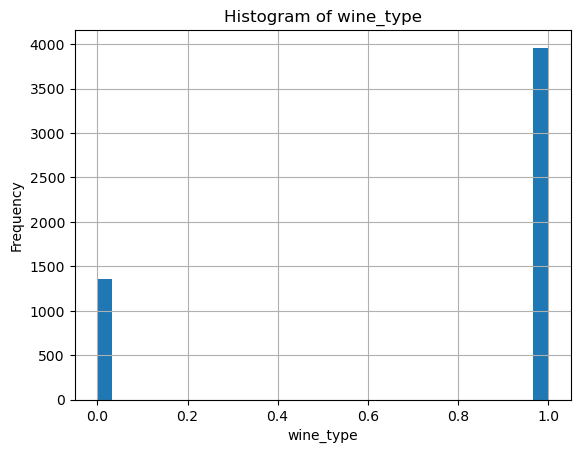

In [306]:
# Loop through all numeric columns
for column in all_wine.select_dtypes(include='number').columns:
    # Create the histogram for each numeric column
    all_wine[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# It is a normal distribution because the histograms are almost shaped like a bell curve    

In [307]:
redwinequality = red_dataframe['quality'].mean()
whitewinequality = white_dataframe['quality'].mean()

print(f"Gennemsnitlig kvalitet for rødvin: {redwinequality:.2f}")
print(f"Gennemsnitlig kvalitet for hvidvin: {whitewinequality:.2f}")

Gennemsnitlig kvalitet for rødvin: 5.62
Gennemsnitlig kvalitet for hvidvin: 5.85


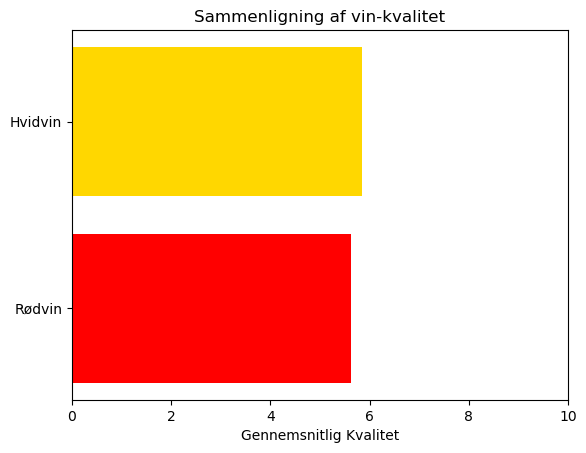

In [308]:
plt.barh(['Rødvin', 'Hvidvin'], [redwinequality, whitewinequality], color=['red', 'gold'])
plt.xlabel('Gennemsnitlig Kvalitet')
plt.title('Sammenligning af vin-kvalitet')
plt.xlim(0, 10)
plt.show()

In [309]:
redwinealcohol = red_dataframe['alcohol'].mean()
whitewinealcohol = white_dataframe['alcohol'].mean()

print(f"Gennemsnitlig alcohol for rødvin: {redwinealcohol:.2f}")
print(f"Gennemsnitlig alcohol for hvidvin: {whitewinealcohol:.2f}")


Gennemsnitlig alcohol for rødvin: 10.43
Gennemsnitlig alcohol for hvidvin: 10.59


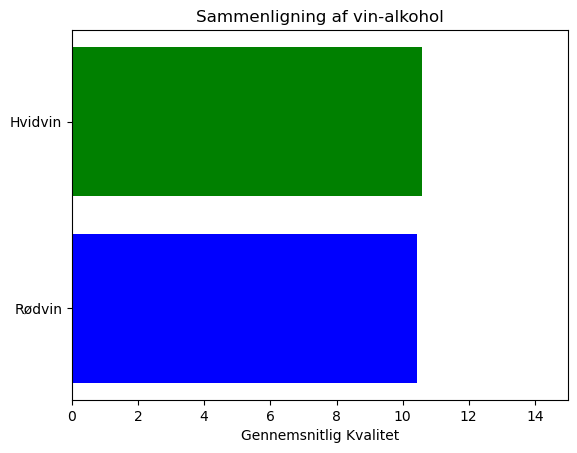

In [310]:
plt.barh(['Rødvin', 'Hvidvin'], [redwinealcohol, whitewinealcohol], color=['blue', 'green'])
plt.xlabel('Gennemsnitlig Kvalitet')
plt.title('Sammenligning af vin-alkohol')
plt.xlim(0, 15)
plt.show()


In [311]:
redwineresidual_sugar = red_dataframe['residual sugar'].mean()
whitewineresidual_sugar = white_dataframe['residual sugar'].mean()

print(f"Gennemsnitlig residual sugar for rødvin: {redwineresidual_sugar:.2f}")
print(f"Gennemsnitlig residual sugar for hvidvin: {whitewineresidual_sugar:.2f}")

Gennemsnitlig residual sugar for rødvin: 2.52
Gennemsnitlig residual sugar for hvidvin: 5.91


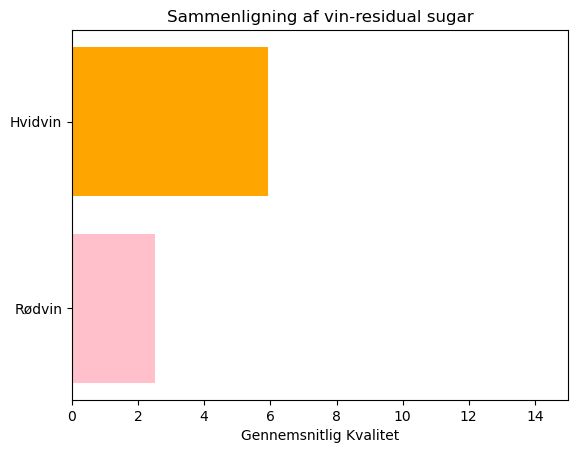

In [312]:
plt.barh(['Rødvin', 'Hvidvin'], [redwineresidual_sugar, whitewineresidual_sugar], color=['pink', 'orange'])
plt.xlabel('Gennemsnitlig Kvalitet')
plt.title('Sammenligning af vin-residual sugar')
plt.xlim(0, 15)
plt.show()

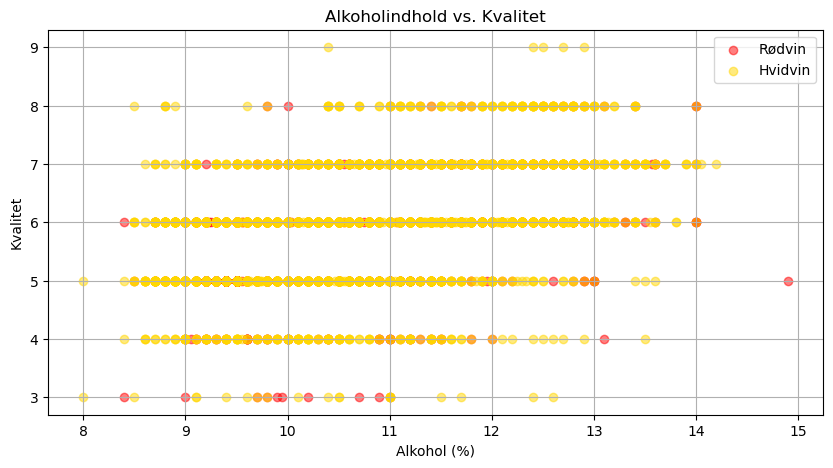

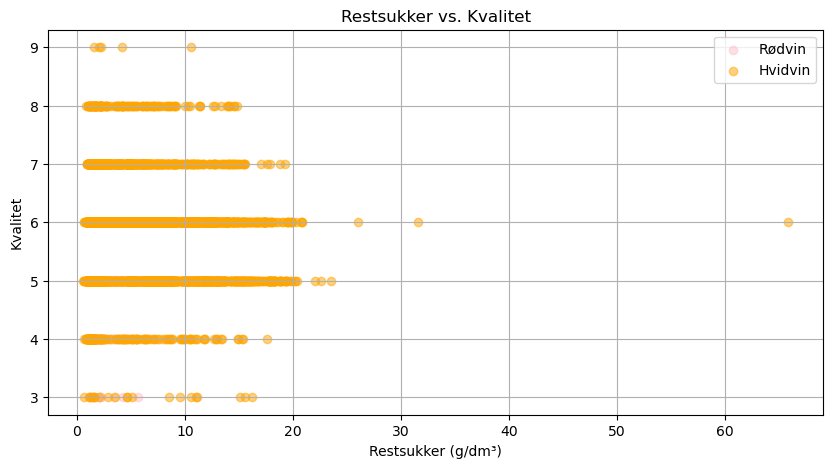

In [313]:
# Scatter plot: Alkohol vs. Kvalitet
plt.figure(figsize=(10, 5))

plt.scatter(red_dataframe['alcohol'], red_dataframe['quality'], color='red', label='Rødvin', alpha=0.5)
plt.scatter(white_dataframe['alcohol'], white_dataframe['quality'], color='gold', label='Hvidvin', alpha=0.5)

plt.xlabel('Alkohol (%)')
plt.ylabel('Kvalitet')
plt.title('Alkoholindhold vs. Kvalitet')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Restsukker vs. Kvalitet
plt.figure(figsize=(10, 5))

plt.scatter(red_dataframe['residual sugar'], red_dataframe['quality'], color='pink', label='Rødvin', alpha=0.5)
plt.scatter(white_dataframe['residual sugar'], white_dataframe['quality'], color='orange', label='Hvidvin', alpha=0.5)

plt.xlabel('Restsukker (g/dm³)')
plt.ylabel('Kvalitet')
plt.title('Restsukker vs. Kvalitet')
plt.legend()
plt.grid(True)
plt.show()


In [314]:
# Split the pH column into 5 and 10 equal-width bins
all_wine['pH_bin_5'] = pd.cut(all_wine['pH'], bins=5)
all_wine['pH_bin_10'] = pd.cut(all_wine['pH'], bins=10)

# Get the relative frequency (density) for each bin
density_5 = all_wine['pH_bin_5'].value_counts(normalize=True)
density_10 = all_wine['pH_bin_10'].value_counts(normalize=True)

print("5-bin density:\n", density_5)
print("\n10-bin density:\n", density_10)


5-bin density:
 pH_bin_5
(2.978, 3.236]    0.505075
(3.236, 3.494]    0.392669
(3.494, 3.752]    0.051692
(2.719, 2.978]    0.047556
(3.752, 4.01]     0.003008
Name: proportion, dtype: float64

10-bin density:
 pH_bin_10
(3.107, 3.236]    0.322932
(3.236, 3.365]    0.263722
(2.978, 3.107]    0.182143
(3.365, 3.494]    0.128947
(2.849, 2.978]    0.044925
(3.494, 3.623]    0.042857
(3.623, 3.752]    0.008835
(2.719, 2.849]    0.002632
(3.752, 3.881]    0.002256
(3.881, 4.01]     0.000752
Name: proportion, dtype: float64


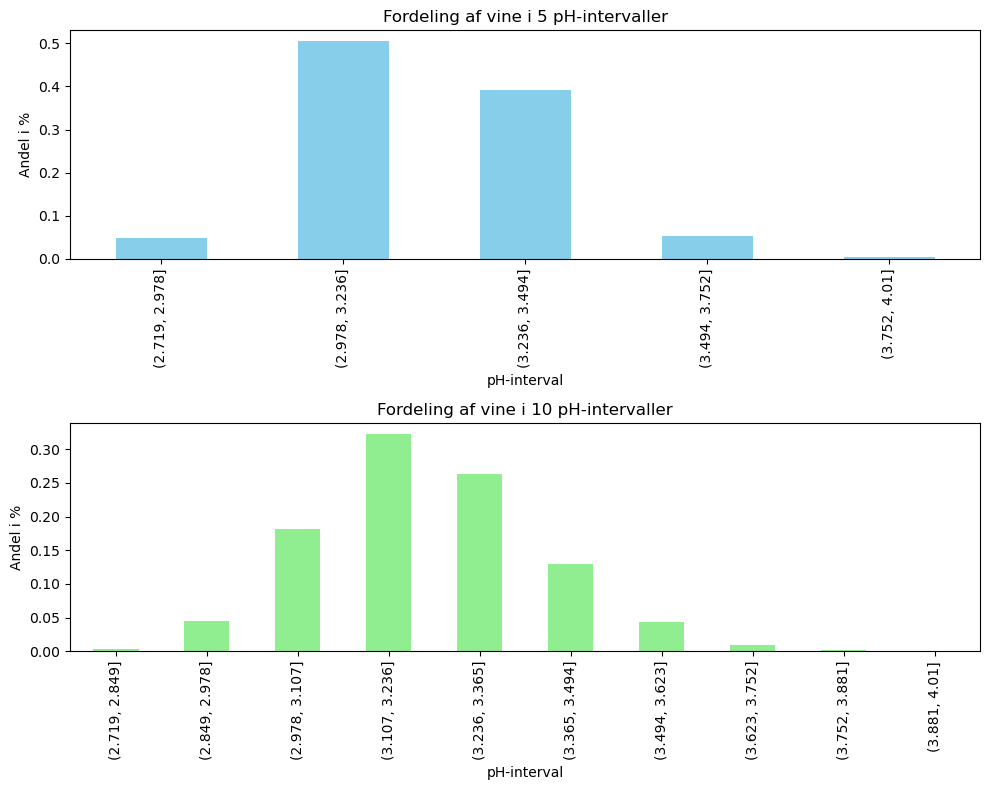

In [315]:
# Simulate the data for the 5 bins
density_5 = pd.Series({
    "(2.978, 3.236]": 0.505075,
    "(3.236, 3.494]": 0.392669,
    "(3.494, 3.752]": 0.051692,
    "(2.719, 2.978]": 0.047556,
    "(3.752, 4.01]": 0.003008
})

density_10 = pd.Series({
    "(3.107, 3.236]": 0.322932,
    "(3.236, 3.365]": 0.263722,
    "(2.978, 3.107]": 0.182143,
    "(3.365, 3.494]": 0.128947,
    "(2.849, 2.978]": 0.044925,
    "(3.494, 3.623]": 0.042857,
    "(3.623, 3.752]": 0.008835,
    "(2.719, 2.849]": 0.002632,
    "(3.752, 3.881]": 0.002256,
    "(3.881, 4.01]": 0.000752
})

# Make bar chart
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# 5-bins plot
density_5.sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Fordeling af vine i 5 pH-intervaller')
axes[0].set_ylabel('Andel i %')
axes[0].set_xlabel('pH-interval')

# 10-bins plot
density_10.sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Fordeling af vine i 10 pH-intervaller')
axes[1].set_ylabel('Andel i %')
axes[1].set_xlabel('pH-interval')

plt.tight_layout()
plt.show()

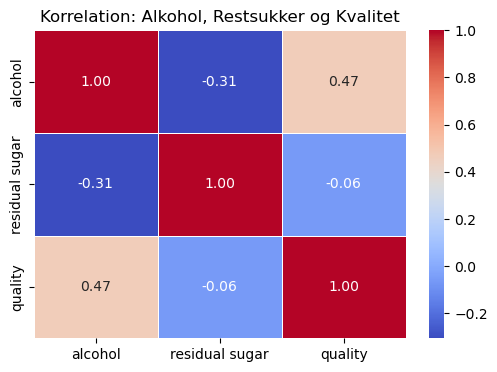

In [316]:
# Vælg kun de relevante kolonner
subset = all_wine[['alcohol', 'residual sugar', 'quality']]

# Beregn korrelation
corr_subset = subset.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelation: Alkohol, Restsukker og Kvalitet')
plt.show()

In [317]:
# Task 11, 12, 13 and 14 (prepare the data for further analysis) 
print("Red wine shape:", red_dataframe.shape)
print("White wine shape:", white_dataframe.shape)
print("Combined shape:", all_wine.shape)

display(red_dataframe.describe())
display(white_dataframe.describe())
display(all_wine.describe())

Red wine shape: (1359, 13)
White wine shape: (3961, 13)
Combined shape: (5320, 15)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [318]:
all_wine['residual sugar'].describe()


count    5320.000000
mean        5.048477
std         4.500180
min         0.600000
25%         1.800000
50%         2.700000
75%         7.500000
max        65.800000
Name: residual sugar, dtype: float64

In [319]:
upper_lim = all_wine['residual sugar'].quantile(0.95)
lower_lim = all_wine['residual sugar'].quantile(0.05)

# Keep only values between the 5th and 95th percentiles
no_outliers = all_wine[(all_wine['residual sugar'] < upper_lim) & (all_wine['residual sugar'] > lower_lim)]
no_outliers.shape

(4773, 15)

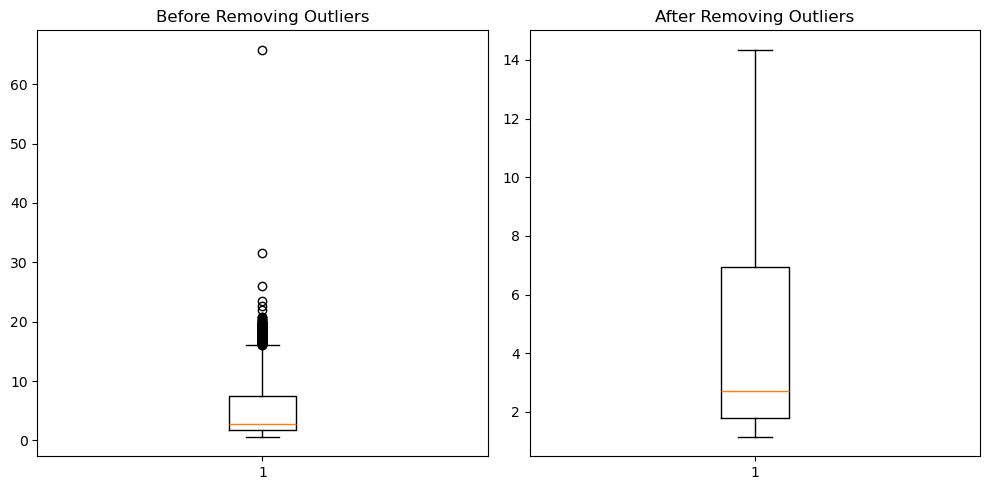

In [320]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(all_wine['residual sugar'])
plt.title("Before Removing Outliers")

plt.subplot(1,2,2)
plt.boxplot(no_outliers['residual sugar'])
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

In [321]:
# Ensure only numeric columns are used for correlation
numeric_df = no_outliers.select_dtypes(include='number')

# Calculate correlations with 'quality' column
correlations_cleaned = numeric_df.corr()['quality']

# Sort and print the results
print(correlations_cleaned.sort_values(ascending=False))



quality                 1.000000
alcohol                 0.487753
wine_type               0.135721
citric acid             0.106966
free sulfur dioxide     0.058286
sulphates               0.030913
pH                      0.023937
residual sugar         -0.032293
total sulfur dioxide   -0.037006
fixed acidity          -0.089174
chlorides              -0.217633
volatile acidity       -0.276224
density                -0.361397
Name: quality, dtype: float64


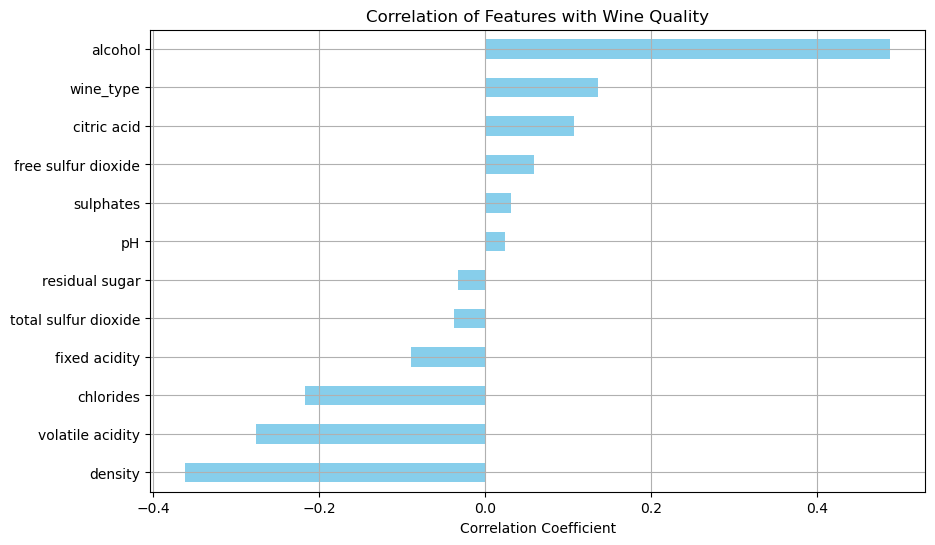

In [322]:
# Select only numeric columns
numeric_df = no_outliers.select_dtypes(include='number')

# Ensure 'quality' is in the DataFrame
if 'quality' in numeric_df.columns:
    correlations_sorted = numeric_df.corr()['quality'].sort_values()

    # Plot (excluding 'quality' itself from the bar chart)
    plt.figure(figsize=(10,6))
    correlations_sorted.drop('quality').plot(kind='barh', color='skyblue')
    plt.title('Correlation of Features with Wine Quality')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True)
    plt.show()
else:
    print("'quality' column is missing or not numeric.")


In [323]:
threshold = 0.05
weak_corr_features_cleaned = correlations_cleaned[correlations_cleaned.abs() < threshold].index.tolist()
print("Weakly correlated features to drop:", weak_corr_features_cleaned)

Weakly correlated features to drop: ['residual sugar', 'total sulfur dioxide', 'pH', 'sulphates']


In [325]:
# Keep only numeric columns for PCA
numeric_df = all_wine.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

pca_data


array([[ 5.83963730e+01,  1.93955415e+00,  1.34757027e+01, ...,
        -4.20912755e-02, -8.56469647e-03,  2.86247888e-04],
       [ 1.35895176e+01, -1.97904789e+01, -3.55524621e+00, ...,
         5.48886468e-02, -6.41651702e-03,  6.40878790e-04],
       [-1.65774435e+01,  3.94425833e+00,  2.46029555e+00, ...,
         7.87270906e-02,  6.84477896e-03, -7.42606324e-04],
       ...,
       [-5.94098321e+01,  2.32501231e+01, -1.08574261e+00, ...,
        -1.65340441e-02, -2.16581291e-02,  6.41936824e-04],
       [-6.78289164e+01,  1.80412210e+01, -7.86100910e-01, ...,
         7.07627649e-02, -1.84618324e-02, -3.05185660e-04],
       [-7.29385674e+01,  4.92574482e+00,  1.17598850e+00, ...,
        -1.72477471e-02, -2.36391004e-02,  7.30963127e-04]])

In [326]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([9.54018867e-01, 4.06146567e-02, 4.31982694e-03, 5.14664688e-04,
       3.55091645e-04, 1.33958282e-04, 2.59477761e-05, 5.83549035e-06,
       4.49899514e-06, 3.74466028e-06, 2.67727992e-06, 2.30026200e-07,
       1.18347828e-10])

C:\Users\masih\AppData\Local\Temp\ipykernel_18556\1047061413.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


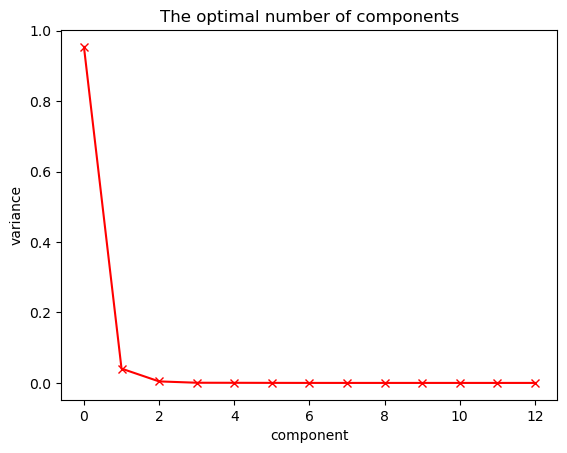

In [327]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

C:\Users\masih\AppData\Local\Temp\ipykernel_18556\1148483022.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


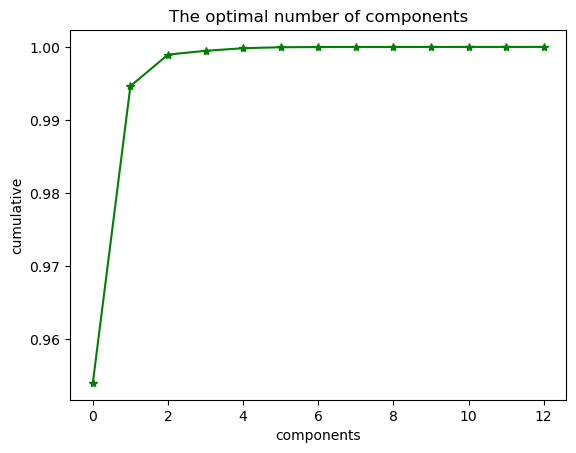

In [328]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

In [331]:
# Keep only numeric columns
numeric_df = all_wine.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA(n_components=5)
pca_data = pca.fit_transform(numeric_df)

pca_data

array([[ 5.83963730e+01,  1.93955415e+00,  1.34757027e+01,
         7.49796073e-02, -2.26075252e-01],
       [ 1.35895176e+01, -1.97904789e+01, -3.55524621e+00,
        -7.18536620e-03, -1.12721202e+00],
       [-1.65774435e+01,  3.94425833e+00,  2.46029555e+00,
         6.27498035e-01,  3.50035737e-01],
       ...,
       [-5.94098321e+01,  2.32501231e+01, -1.08574261e+00,
        -1.21181903e+00, -1.02066890e+00],
       [-6.78289164e+01,  1.80412210e+01, -7.86100910e-01,
        -3.59814885e-01, -2.08304926e+00],
       [-7.29385674e+01,  4.92574482e+00,  1.17598850e+00,
        -1.35654554e+00, -1.06226483e+00]])

In [332]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5'])
pcadf


,pc 1,pc 2,pc 3,pc 4,pc 5
0,58.396373,1.939554,13.475703,0.074980,-0.226075
1,13.589518,-19.790479,-3.555246,-0.007185,-1.127212
2,-16.577444,3.944258,2.460296,0.627498,0.350036
3,73.943722,-0.033984,0.671274,0.432725,0.326785
4,21.365568,-5.049272,1.261346,-0.322151,-0.964679
...,...,...,...,...,...
5315,-74.591068,15.536800,-0.522080,0.325477,-1.509453
5316,-67.832480,18.040292,-0.798273,-0.328028,-1.697358
5317,-59.409832,23.250123,-1.085743,-1.211819,-1.020669
5318,-67.828916,18.041221,-0.786101,-0.359815,-2.083049
